# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка Pytorch. 

#        Пример обучения нейронной сети в numpy

In [1]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 30401617.367504403
1 26907051.789025135
2 25554835.118968897
3 23213179.763018064
4 18690569.82009149
5 13262818.63884113
6 8436421.936367154
7 5124106.923426013
8 3123786.7648587013
9 2002857.5723057282
10 1373426.4180825637
11 1007492.9642115913
12 780602.8545104223
13 629456.4146035246
14 521685.3800410244
15 440506.79486186086
16 376580.1924720681
17 324911.20009341685
18 282225.0326817918
19 246463.05168265098
20 216255.40675924433
21 190510.40659830585
22 168418.63297192415
23 149367.5730442771
24 132839.71626732207
25 118446.54733538226
26 105873.03219622625
27 94844.15350608338
28 85164.46032513917
29 76641.07141640136
30 69105.4120191438
31 62428.446934517386
32 56492.87742577092
33 51201.863385748824
34 46481.865056138646
35 42271.4274615166
36 38496.221683002426
37 35107.0058891324
38 32061.73127657911
39 29318.135848878996
40 26851.32164918449
41 24628.529621836515
42 22615.783253283804
43 20789.71983158777
44 19131.417277195273
45 17624.179683672162
46 16251.227697765462

359 0.0014874413302988505
360 0.0014187762071604171
361 0.001353232280326952
362 0.0012907539688739745
363 0.001231156105711648
364 0.001174302138392243
365 0.0011200924526439324
366 0.001068364904973897
367 0.0010190628167508601
368 0.0009720091968996098
369 0.0009271422556874268
370 0.000884346380738442
371 0.0008435726893902575
372 0.0008046315199679056
373 0.000767488683505565
374 0.0007320684904841544
375 0.0006982960355277646
376 0.0006660776921143647
377 0.0006353423517422982
378 0.0006060427536092311
379 0.0005780864869445314
380 0.0005514254642041761
381 0.0005259863974802128
382 0.0005017393796114575
383 0.00047859468266727806
384 0.0004565166432870544
385 0.0004354569934030861
386 0.0004153842759891361
387 0.0003962352514662455
388 0.000377966603447176
389 0.0003605448798322592
390 0.0003439273743852191
391 0.0003280667244294524
392 0.0003129394199316084
393 0.0002985199339080935
394 0.0002847619852228632
395 0.000271633162804961
396 0.000259114159319767
397 0.00024717334956

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от np.array, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [2]:
import torch

In [3]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [4]:
x


1.00000e-42 *
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  1.4798  0.0000
  0.0000  0.7259  0.0000
[torch.FloatTensor of size 5x3]

In [5]:
# Типы
torch.FloatTensor
torch.LongTensor

torch.LongTensor

In [6]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [7]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [8]:
x


 0.5697 -1.1872  1.4526
-2.1373 -0.5291 -1.3747
-0.6914 -1.2698 -1.4467
-0.6782 -0.8007  0.4570
-0.0709  0.0510 -1.3882
[torch.FloatTensor of size 5x3]

In [9]:
x.shape

torch.Size([5, 3])

In [10]:
x.size()

torch.Size([5, 3])

In [11]:
y = torch.rand(5, 3)

In [12]:
y


 0.6663  0.8809  0.9793
 0.6258  0.1884  0.7894
 0.8475  0.5063  0.1237
 0.4551  0.6440  0.0486
 0.0748  0.9538  0.2442
[torch.FloatTensor of size 5x3]

In [13]:
# Первый способ сложить 2 тензора
x + y


 1.2361 -0.3063  2.4319
-1.5116 -0.3407 -0.5854
 0.1560 -0.7635 -1.3231
-0.2232 -0.1567  0.5056
 0.0039  1.0048 -1.1440
[torch.FloatTensor of size 5x3]

In [14]:
# Второй способ сложить 2 тензора
x.add(y)


 1.2361 -0.3063  2.4319
-1.5116 -0.3407 -0.5854
 0.1560 -0.7635 -1.3231
-0.2232 -0.1567  0.5056
 0.0039  1.0048 -1.1440
[torch.FloatTensor of size 5x3]

In [15]:
# А еще можно так:
torch.add(x, y)


 1.2361 -0.3063  2.4319
-1.5116 -0.3407 -0.5854
 0.1560 -0.7635 -1.3231
-0.2232 -0.1567  0.5056
 0.0039  1.0048 -1.1440
[torch.FloatTensor of size 5x3]

In [16]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 1.2361 -0.3063  2.4319
-1.5116 -0.3407 -0.5854
 0.1560 -0.7635 -1.3231
-0.2232 -0.1567  0.5056
 0.0039  1.0048 -1.1440
[torch.FloatTensor of size 5x3]

In [17]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [18]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [19]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)


 1.3460 -0.4109 -1.4639  0.2791
-2.4297 -0.7411  0.5840 -0.1110
 1.3048  0.2527 -0.4491  0.2691
 1.1277  1.1615  0.9438  0.0416
-1.6356  0.3267  1.5466 -0.2741
[torch.FloatTensor of size 5x4]

In [20]:
# для python 3

a @ b


 1.3460 -0.4109 -1.4639  0.2791
-2.4297 -0.7411  0.5840 -0.1110
 1.3048  0.2527 -0.4491  0.2691
 1.1277  1.1615  0.9438  0.0416
-1.6356  0.3267  1.5466 -0.2741
[torch.FloatTensor of size 5x4]

Поменяем пару строчек в обучении на np и код уже можно запускать и на GPU

In [23]:
#dtype = torch.FloatTensor
dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 26029830.0
1 23418938.0
2 22603840.0
3 21057362.0
4 17674544.0
5 13153176.0
6 8775849.0
7 5485197.0
8 3365186.75
9 2125357.5
10 1418046.0
11 1010625.375
12 765183.125
13 607963.4375
14 499952.53125
15 420973.21875
16 360212.875
17 311643.3125
18 271771.65625
19 238422.078125
20 210170.71875
21 186002.96875
22 165200.90625
23 147198.78125
24 131552.25
25 117887.734375
26 105914.578125
27 95392.3203125
28 86117.1328125
29 77910.4765625
30 70636.8125
31 64170.25390625
32 58402.890625
33 53276.56640625
34 48689.62109375
35 44572.99609375
36 40869.4375
37 37531.15625
38 34517.19140625
39 31788.474609375
40 29315.203125
41 27070.85546875
42 25031.46484375
43 23179.095703125
44 21489.599609375
45 19946.97265625
46 18535.70703125
47 17243.728515625
48 16059.751953125
49 14972.46875
50 13972.193359375
51 13051.3759765625
52 12202.9111328125
53 11419.9326171875
54 10696.775390625
55 10027.8916015625
56 9408.58984375
57 8834.7275390625
58 8303.86328125
59 7811.4384765625
60 7353.681640625
61 69

485 0.0009955550776794553
486 0.0009697701898403466
487 0.0009463948663324118
488 0.0009224520181305707
489 0.000899905280675739
490 0.0008755660383030772
491 0.0008552041254006326
492 0.0008342849905602634
493 0.0008155480027198792
494 0.0007948683924041688
495 0.0007753612590022385
496 0.0007565378909930587
497 0.0007390473620034754
498 0.00072236213600263
499 0.0007046484970487654


# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [1]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [6]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [3]:
x.grad

In [4]:
# производная операции, которая породила переменную.
x.grad_fn

In [5]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

В новой версии pytorch промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию variable.register_hook(print)
или использовать Variable.retain_grad()

In [29]:
from __future__ import print_function
print (y.grad is None)
y.register_hook(print)

True


In [30]:
z = y * y * 2
z
print (z.grad is None)
z.register_hook(print)

True


In [31]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [32]:
# Запускаем бэкпроп
# На выходе получаем градиенты из хуков
out.backward()

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [33]:

x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [34]:
v = torch.autograd.Variable(torch.randn(3), requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]

# Что произошло?

autograd строит ациклический граф вычисления из переменных и операций (функций)
out.backward проходит по всему графу начиная от вершины out и считает градиенты вершин

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [70]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

Variable containing:
 6
 4
[torch.FloatTensor of size 2]

In [ ]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

In [ ]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



In [35]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



# Снова вернемся к исходной двухслойной сети

In [ ]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

In [ ]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [87]:
loss_fn(model(x), y)

Variable containing:
1.00000e-12 *
  1.6793
[torch.FloatTensor of size 1]

# А еще там есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [ ]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

In [6]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [38]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [39]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). PyTorch имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


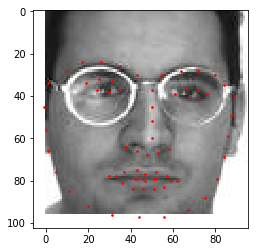

In [12]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [46]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


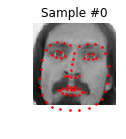

1 (96, 96) (68, 2)


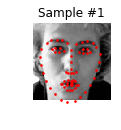

2 (96, 96) (68, 2)


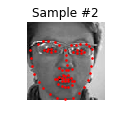

3 (96, 96) (68, 2)


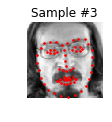

In [47]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [59]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

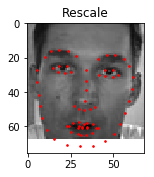

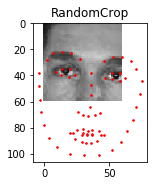

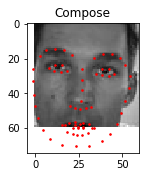

In [55]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [60]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


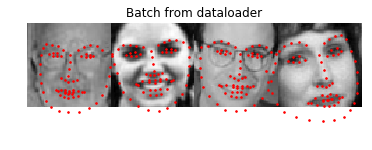

In [63]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [1]:
import pandas as pd

In [64]:
pd.read_csv("dataset/train/face_landmarks.csv")

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,...,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,...,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,...,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,...,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,...,54,65,62,70,54,72,50,72,46,71
5,1001.jpeg,10,38,12,48,14,58,16,66,19,...,51,68,60,71,52,76,48,76,44,76
6,1002.jpeg,5,30,5,42,6,53,7,63,9,...,49,79,57,81,49,81,44,81,39,80
7,1003.jpeg,11,36,13,46,15,56,18,66,21,...,54,73,62,73,54,77,50,77,45,77
8,1004.jpeg,8,31,8,41,9,51,10,61,14,...,48,76,55,77,48,75,44,75,41,73
9,1005.jpeg,15,36,16,45,17,53,19,61,22,...,48,66,54,69,48,70,45,70,42,69
